In [1]:
import os
import random
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Paths
image_dir = "/home/shobha/week1_p2/agri_data/data/"
label_dir = "/home/shobha/week1_p2/agri_data/data/"
test_folder = "/home/shobha/week1_p2/agri_data/test/"

In [3]:
# Load data
def load_data(image_dir, label_dir):
    images, labels = [], []
    for image_file in os.listdir(image_dir):
        if image_file.endswith(".jpeg"):
            img_path = os.path.join(image_dir, image_file)
            img = Image.open(img_path).resize((128, 128)).convert("L")
            img = np.array(img).flatten()

            label_path = os.path.join(label_dir, image_file.replace(".jpeg", ".txt"))
            with open(label_path, "r") as f:
                label = int(f.read().strip().split()[0])

            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [4]:
# Load and split data
X, y = load_data(image_dir, label_dir)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [6]:
# Evaluate model
y_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.9038461538461539


In [7]:
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

In [8]:
# Function to predict and display a single image
def predict_and_display_image(image_path, actual_label=None):
    img = Image.open(image_path).resize((128, 128)).convert("L")
    img_array = np.array(img).flatten().reshape(1, -1)
    pred_label = clf.predict(img_array)[0]
    
    # Display the image with prediction
    img_to_show = np.array(img).reshape(128, 128)
    plt.imshow(img_to_show, cmap="gray")
    plt.title(f"Actual: {actual_label if actual_label is not None else 'Unknown'} | Predicted: {'Crop' if pred_label == 0 else 'Weed'}")
    plt.axis("off")
    plt.show()

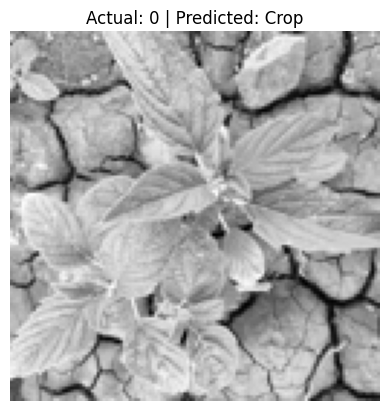

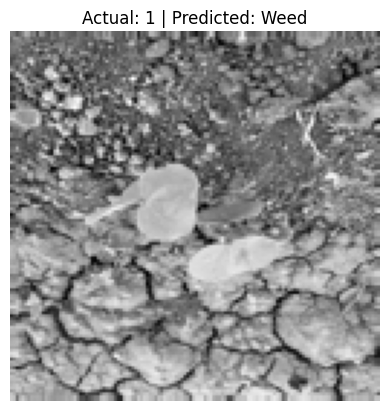

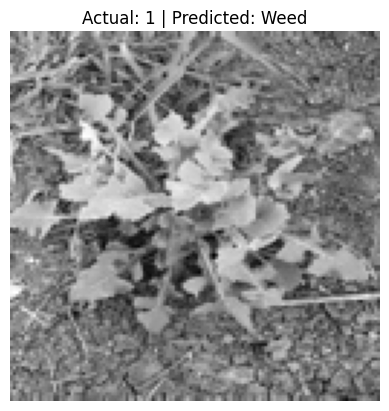

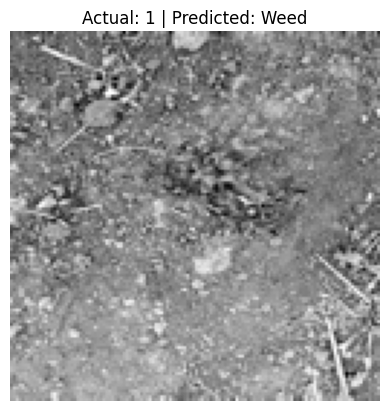

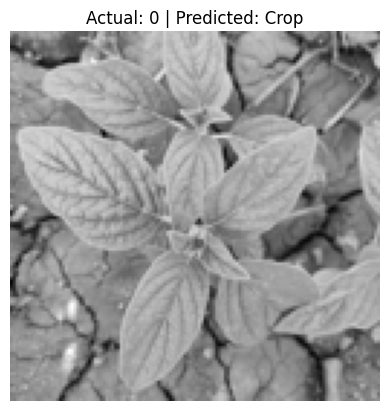

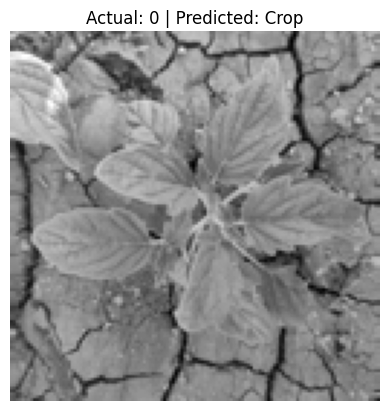

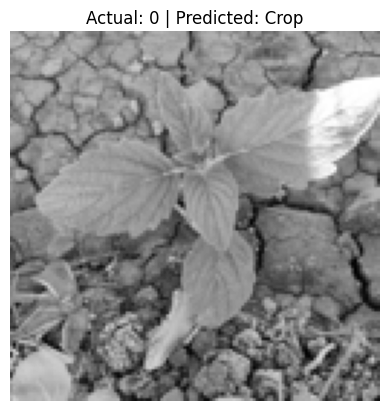

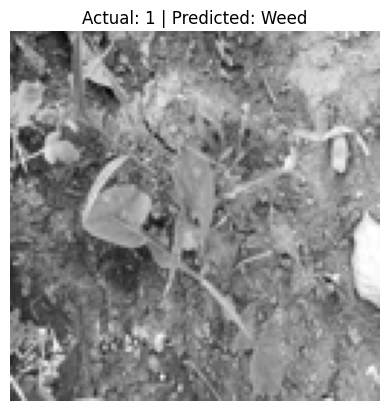

Model Accuracy: 100.00%


In [9]:
# Lists to store actual and predicted labels
actual_labels = []
predicted_labels = []

# Loop through test images and display predictions
for image_file in os.listdir(test_folder):
    if image_file.endswith(".jpeg"):
        image_path = os.path.join(test_folder, image_file)
        
        # Get the actual label
        label_path = os.path.join(label_dir, image_file.replace(".jpeg", ".txt"))
        with open(label_path, "r") as f:
            actual_label = int(f.read().strip().split()[0])
        
        # Predict the label
        img = Image.open(image_path).resize((128, 128)).convert("L")
        img_array = np.array(img).flatten().reshape(1, -1)
        predicted_label = clf.predict(img_array)[0]
        
        # Append labels to the lists
        actual_labels.append(actual_label)
        predicted_labels.append(predicted_label)
        
        # Display the image with prediction
        predict_and_display_image(image_path, actual_label)

# Calculate accuracy
accuracy = calculate_accuracy(actual_labels, predicted_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
